# DAT210x - Programming with Python for DS

## Module4- Lab4

### Lab Assignment 4
After having a brief conversation with [Joshua Tenenbaum](https://en.wikipedia.org/wiki/Joshua_Tenenbaum), the primary creator of the isometric feature mapping algorithm, it only seems right that we make your first lab assignment be replicating his canonical, dimensionality reduction research experiment for visual perception! In fact, you will also be using his [original dataset (cached website)](https://web.archive.org/web/20160913051505/http://isomap.stanford.edu/datasets.html) from December 2000. It consists of 698 samples of 4096-dimensional vectors. These vectors are the coded brightness values of 64x64-pixel heads that have been rendered facing various directions and lighted from many angles. Replicate Dr. Tenenbaum's experiment by:

<ol>
<li>Applying both PCA and Isomap to the 698 raw images to derive 2D principal components and a 2D embedding of the data's intrinsic geometric structure.
<li>Project both onto a 2D scatter plot, with a few superimposed face images on the associated samples.
<li>Extra: If you're feeling fancy, increase n_components to three, and plot your scatter plot on a 3D chart.
    
**NOTE:** If you encounter issues with loading .mat files using SciPy, you might want to see this [Stack Overflow](http://stackoverflow.com/questions/35283073/scipy-io-loadmat-doesnt-work) post and check the version of SciPy you're using.

In [1]:
import math, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.io

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
# plt.style.use('ggplot')

### Some Boilerplate Code

For your convenience, we've included some boilerplate code here which will help you out. You aren't expected to know how to write this code on your own at this point, but it'll assist with your visualizations and loading of the `.mat` file. We've added some notes to the code in case you're interested in knowing what it's doing:

In [3]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

A `.MAT` file is a MATLAB file type. The faces dataset could have came in through `.png` images, but we'll show you how to do that in another lab. For now, you'll see how to import `.mats`:

In [4]:
mat = scipy.io.loadmat('Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### And Now, The Assignment

Implement PCA here. Reduce the dataframe `df` down to _three_ components. Once you've done that, call Plot2D.

The format is: `Plot2D(T, title, x, y, num_to_plot=40)`:

- `T` Your transformed data, stored in an NDArray.
- `title` Your chart's title
- `x` Index of the principal component you want displayed on the x-axis; set it to `0` or `1`
- `y` Index of the principal component you want displayed on the y-axis; set it to `1` or `2`

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


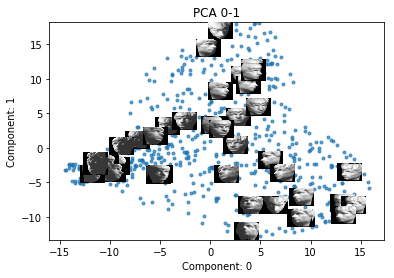

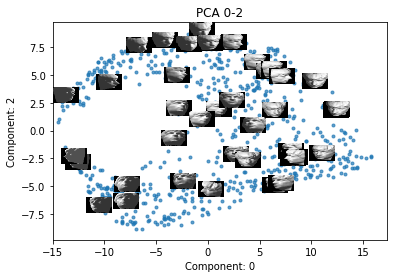

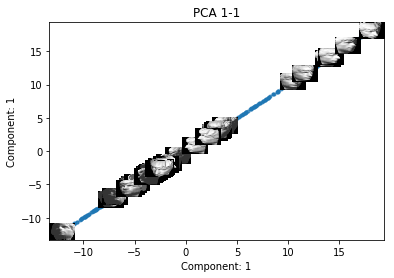

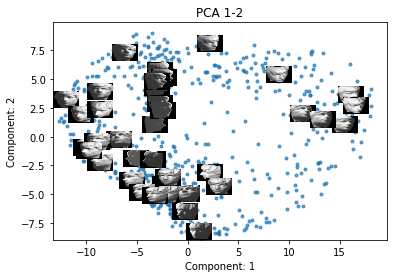

In [17]:
# .. your code here ..
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(df)
T=pca.transform(df)

Plot2D(T,'PCA 0-1',0,1,num_to_plot=40)
Plot2D(T,'PCA 0-2',0,2,num_to_plot=40)
Plot2D(T,'PCA 1-1',1,1,num_to_plot=40)
Plot2D(T,'PCA 1-2',1,2,num_to_plot=40)

Implement Isomap here. Reduce the dataframe `df` down to _three_ components. Once you've done that, call Plot2D using the first two components:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


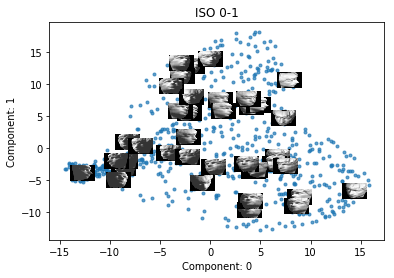

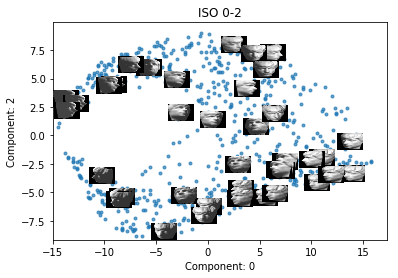

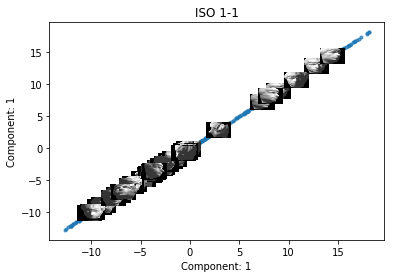

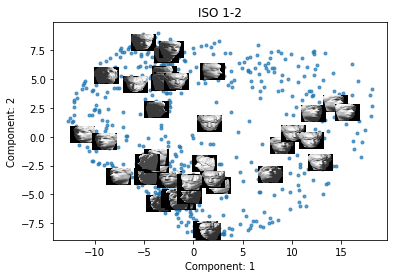

In [18]:
# .. your code here ..
from sklearn import manifold
iso=manifold.Isomap(n_neighbors=4,n_components=3)
iso.fit(df)
I=iso.transform(df)

Plot2D(T,'ISO 0-1',0,1,num_to_plot=40)
Plot2D(T,'ISO 0-2',0,2,num_to_plot=40)
Plot2D(T,'ISO 1-1',1,1,num_to_plot=40)
Plot2D(T,'ISO 1-2',1,2,num_to_plot=40)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


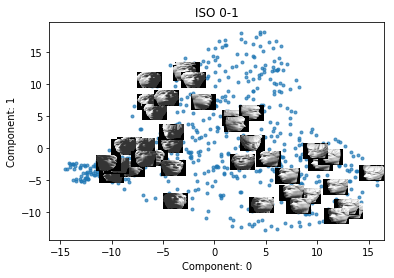

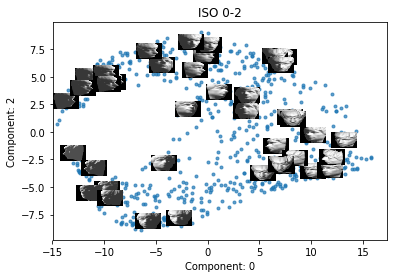

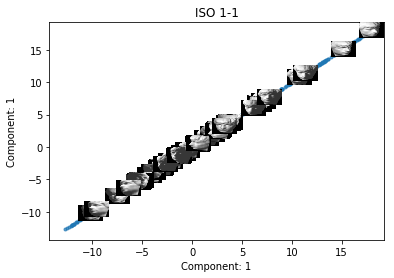

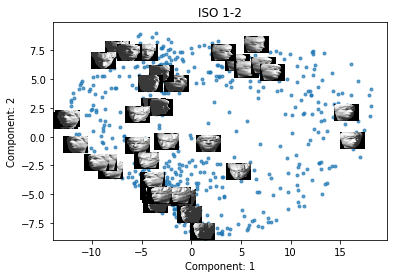

In [29]:
# .. your code here ..
from sklearn import manifold
iso=manifold.Isomap(n_neighbors=4,n_components=2)
iso.fit(df)
I=iso.transform(df)

Plot2D(T,'ISO 0-1',0,1,num_to_plot=40)
Plot2D(T,'ISO 0-2',0,2,num_to_plot=40)
Plot2D(T,'ISO 1-1',1,1,num_to_plot=40)
Plot2D(T,'ISO 1-2',1,2,num_to_plot=40)

If you're up for a challenge, draw your dataframes in 3D. Even if you're not up for a challenge, just do it anyway. You might have to increase the dimensionality of your transformed dataset:

In [27]:
# .. your code here ..
def Plot3D(T, title, x, y,z, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    ax.set_zlabel('Component: {0}'.format(z))

    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    z_size = (max(T[:,z]) - min(T[:,z])) * 0.08

    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0,z0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.,T[img_num,z]-z_size/2.
        x1, y1, z0 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2., T[img_num,z]+z_size/2.

        img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y],T[:,z], marker='.',alpha=0.7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


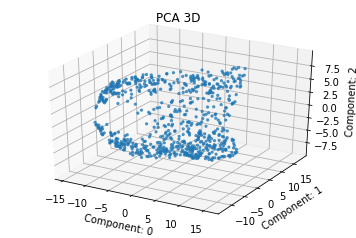

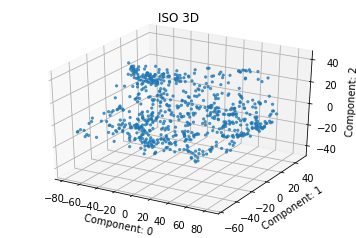

In [28]:
Plot3D(T,'PCA 3D',0,1,2,num_to_plot=40)
Plot3D(I,'ISO 3D',0,1,2,num_to_plot=40)

plt.show()

### Lab Questions
Between linear PCA and the non-linear Isomap, which algorithm is better able to capture the true nature of the faces dataset when reduced to two component?
**IsoMap**

Each coordinate axis of your 3D manifold should correlate highly with one degree of freedom from the original, underlying data. In the isomap plot of the first two components (0 and 1), which 'degree of freedom' do you think was encoded onto first component (the X-axis) encoded? In other words, what varies as you move horizontally in your manifold rendering?
**Left and Right Head Position**

Alter your code to graph the second and third components (index=1 and 2) instead of the 0th and 1st, for both PCA and Isomap.
Look *closely* at the Isomap plot. Can you tell what 'degree of freedom' the X axis represents?
**Down and Up Head Position**

In his experiment, Dr. Tenenbaum set his K-parameter (n_neighbors is SciKit-Learn) to 8. Try reducing that figure down to 3 and re-running your code. Does the X-Axis still represent the same degree of freedom?
**Yes**